In [1]:
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Sales_analysis/

/content/drive/MyDrive/Sales_analysis


In [3]:
import pandas as pd
import os

In [4]:
files=[file for file in os.listdir('./data')]

for file in files:
    print(file)
    

sales_november_2019.csv
sales_june_2019.csv
sales_may_2019.csv
sales_march_2019.csv
sales_april_2019.csv
sales_july_2019.csv
sales_august_2019.csv
sales_february_2019.csv
sales_december_2019.csv
sales_september_2019.csv
sales_october_2019.csv
sales_january_2019.csv


In [5]:
year_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./data/'+file)
    year_data=pd.concat([year_data,df])
    
year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [6]:
year_data.shape

(186850, 6)

In [7]:
year_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
year_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

## **Cleaning data**

In [9]:
year_data.isnull().values.any()

True

In [10]:
##to find how many nan values are present
year_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
year_data[year_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
69,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
8596,NaN,NaN,NaN,NaN,NaN,NaN
8623,NaN,NaN,NaN,NaN,NaN,NaN
9144,NaN,NaN,NaN,NaN,NaN,NaN
9631,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
year_data.shape

(186850, 6)

In [13]:
year_data=year_data.dropna()

year_data.shape

(186305, 6)

what was the best month for sales? how much was earned that month?


In [15]:
## first add a month column
year_data['Month']=year_data['Order Date'].str[0:2]
year_data['Month']=year_data['Month'].astype('int32')

year_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: ignored

In [16]:
# Find 'or' and delete it
temp_df=year_data[year_data['Month']=='Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1172,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1620,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1726,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1891,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
6506,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
7544,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
7674,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
8271,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [17]:
year_data.shape

(186305, 7)

In [18]:
year_data=year_data[year_data['Month']!='Or']
year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11
...,...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001",01
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016",01
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035",01
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001",01


In [19]:
year_data.shape

(185950, 7)

In [20]:
year_data['Month']=year_data['Month'].astype('int32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [24]:
year_data['Quantity Ordered']=year_data['Quantity Ordered'].astype('int32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
year_data['Price Each']=year_data['Price Each'].astype('double')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
year_data['Amount']=year_data['Quantity Ordered']*year_data['Price Each']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
year_data.sort_values('Month')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
9722,150501,Google Phone,1,600.00,01/13/19 16:43,"428 Cedar St, Boston, MA 02215",1,600.00
3220,144294,Google Phone,1,600.00,01/13/19 09:56,"306 14th St, Los Angeles, CA 90001",1,600.00
3219,144293,AAA Batteries (4-pack),2,2.99,01/16/19 11:41,"698 Jackson St, Austin, TX 73301",1,5.98
3218,144292,Wired Headphones,1,11.99,01/11/19 21:44,"313 13th St, Los Angeles, CA 90001",1,11.99
3217,144291,Apple Airpods Headphones,1,150.00,01/04/19 18:00,"738 4th St, Dallas, TX 75001",1,150.00
...,...,...,...,...,...,...,...,...
14108,309125,Wired Headphones,1,11.99,12/19/19 21:16,"292 6th St, New York City, NY 10001",12,11.99
14109,309126,Lightning Charging Cable,1,14.95,12/03/19 23:33,"533 Park St, Dallas, TX 75001",12,14.95
14110,309127,27in 4K Gaming Monitor,1,389.99,12/25/19 15:05,"980 Johnson St, New York City, NY 10001",12,389.99
14016,309038,USB-C Charging Cable,1,11.95,12/21/19 16:14,"368 Lincoln St, San Francisco, CA 94016",12,11.95


In [28]:
#month with highest sales
result=year_data.groupby('Month').sum()['Amount']
result

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Amount, dtype: float64

Text(0.5, 0, 'Months')

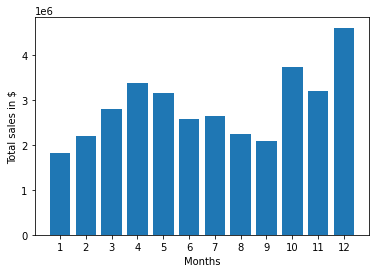

In [29]:
#visualizing the data
import matplotlib.pyplot as plt

months=range(1,13)

plt.bar(months,result)
plt.xticks(months)
plt.ylabel('Total sales in $')
plt.xlabel('Months')

which city sold the most product ?


In [30]:
year_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


In [31]:
#year_data['State']=year_data['Purchase Address'].split(',',1)[1]

year_data['City']=year_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#year_data['State']=year_data['Purchase Address'].apply(lambda x: x.split(',')[2])
year_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston


In [32]:
year_data.shape

(185950, 9)

In [33]:
year_data['State']=year_data['Purchase Address'].apply(lambda x: x.split(',')[2])

In [34]:
year_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City,NY 10001
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin,TX 73301
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles,CA 90001
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle,WA 98101
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston,MA 02215


In [35]:
year_data['City']=year_data['City']+'('+year_data['State'].apply(lambda x: x.split(' ')[1])+')'

In [36]:
year_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City(NY),NY 10001
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin(TX),TX 73301
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles(CA),CA 90001
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle(WA),WA 98101
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston(MA),MA 02215


In [37]:
year_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Amount
City,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


In [38]:
result2=year_data.groupby('City').sum()
result2=result2.sort_values('City')
result2


,Quantity Ordered,Price Each,Month,Amount
City,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


In [39]:
year_data=year_data.sort_values('City')
cities=year_data['City'].unique()

Text(0, 0.5, 'Total Sales in USD($)')

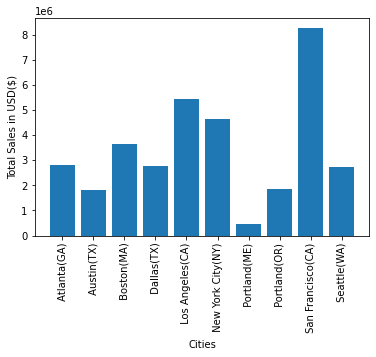

In [40]:
plt.bar(cities,result2['Amount'])
plt.xticks(cities,rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Total Sales in USD($)')

What time should we display advertisements to maximise likelihood of customer's buying product ?

In [41]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State
16346,311291,iPhone,1,700.00,12/13/19 20:57,"550 Lakeview St, Atlanta, GA 30301",12,700.00,Atlanta(GA),GA 30301
7832,217386,USB-C Charging Cable,1,11.95,06/09/19 02:13,"586 Willow St, Atlanta, GA 30301",6,11.95,Atlanta(GA),GA 30301
1975,238566,USB-C Charging Cable,1,11.95,08/13/19 17:34,"347 Madison St, Atlanta, GA 30301",8,11.95,Atlanta(GA),GA 30301
5735,253653,AAA Batteries (4-pack),2,2.99,09/21/19 23:33,"781 Lincoln St, Atlanta, GA 30301",9,5.98,Atlanta(GA),GA 30301
5741,253658,USB-C Charging Cable,1,11.95,09/02/19 18:25,"85 Wilson St, Atlanta, GA 30301",9,11.95,Atlanta(GA),GA 30301


In [42]:
year_data['Order Date']=pd.to_datetime(year_data['Order Date'])

In [43]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State
16346,311291,iPhone,1,700.00,2019-12-13 20:57:00,"550 Lakeview St, Atlanta, GA 30301",12,700.00,Atlanta(GA),GA 30301
7832,217386,USB-C Charging Cable,1,11.95,2019-06-09 02:13:00,"586 Willow St, Atlanta, GA 30301",6,11.95,Atlanta(GA),GA 30301
1975,238566,USB-C Charging Cable,1,11.95,2019-08-13 17:34:00,"347 Madison St, Atlanta, GA 30301",8,11.95,Atlanta(GA),GA 30301
5735,253653,AAA Batteries (4-pack),2,2.99,2019-09-21 23:33:00,"781 Lincoln St, Atlanta, GA 30301",9,5.98,Atlanta(GA),GA 30301
5741,253658,USB-C Charging Cable,1,11.95,2019-09-02 18:25:00,"85 Wilson St, Atlanta, GA 30301",9,11.95,Atlanta(GA),GA 30301


In [44]:
year_data['hour']=year_data['Order Date'].dt.hour
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State,hour
16346,311291,iPhone,1,700.00,2019-12-13 20:57:00,"550 Lakeview St, Atlanta, GA 30301",12,700.00,Atlanta(GA),GA 30301,20
7832,217386,USB-C Charging Cable,1,11.95,2019-06-09 02:13:00,"586 Willow St, Atlanta, GA 30301",6,11.95,Atlanta(GA),GA 30301,2
1975,238566,USB-C Charging Cable,1,11.95,2019-08-13 17:34:00,"347 Madison St, Atlanta, GA 30301",8,11.95,Atlanta(GA),GA 30301,17
5735,253653,AAA Batteries (4-pack),2,2.99,2019-09-21 23:33:00,"781 Lincoln St, Atlanta, GA 30301",9,5.98,Atlanta(GA),GA 30301,23
5741,253658,USB-C Charging Cable,1,11.95,2019-09-02 18:25:00,"85 Wilson St, Atlanta, GA 30301",9,11.95,Atlanta(GA),GA 30301,18


In [45]:
#group amount transacted with hours
result3=year_data.groupby('hour').sum()
result3

,Quantity Ordered,Price Each,Month,Amount
hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


Text(0, 0.5, 'Amount in USD($)')

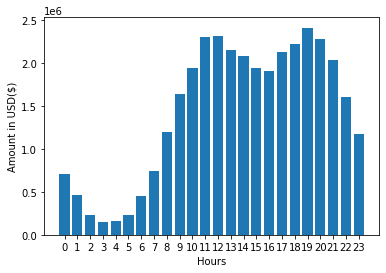

In [46]:
#plotting above data
hours=range(0,24)
plt.bar(hours,result3['Amount'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Amount in USD($)')

Which products are most sold together?

In [47]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State,hour
16346,311291,iPhone,1,700.00,2019-12-13 20:57:00,"550 Lakeview St, Atlanta, GA 30301",12,700.00,Atlanta(GA),GA 30301,20
7832,217386,USB-C Charging Cable,1,11.95,2019-06-09 02:13:00,"586 Willow St, Atlanta, GA 30301",6,11.95,Atlanta(GA),GA 30301,2
1975,238566,USB-C Charging Cable,1,11.95,2019-08-13 17:34:00,"347 Madison St, Atlanta, GA 30301",8,11.95,Atlanta(GA),GA 30301,17
5735,253653,AAA Batteries (4-pack),2,2.99,2019-09-21 23:33:00,"781 Lincoln St, Atlanta, GA 30301",9,5.98,Atlanta(GA),GA 30301,23
5741,253658,USB-C Charging Cable,1,11.95,2019-09-02 18:25:00,"85 Wilson St, Atlanta, GA 30301",9,11.95,Atlanta(GA),GA 30301,18


In [48]:
df=year_data[year_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State,hour
5667,253590,AA Batteries (4-pack),2,3.84,2019-09-26 16:48:00,"513 Pine St, Atlanta, GA 30301",9,7.68,Atlanta(GA),GA 30301,16
5668,253590,USB-C Charging Cable,1,11.95,2019-09-26 16:48:00,"513 Pine St, Atlanta, GA 30301",9,11.95,Atlanta(GA),GA 30301,16
14982,176320,Lightning Charging Cable,1,14.95,2019-03-01 11:57:00,"385 Spruce St, Atlanta, GA 30301",3,14.95,Atlanta(GA),GA 30301,11
14981,176320,iPhone,1,700.00,2019-03-01 11:57:00,"385 Spruce St, Atlanta, GA 30301",3,700.00,Atlanta(GA),GA 30301,11
2170,238757,Google Phone,1,600.00,2019-08-18 22:07:00,"833 Wilson St, Atlanta, GA 30301",8,600.00,Atlanta(GA),GA 30301,22
...,...,...,...,...,...,...,...,...,...,...,...
2967,212745,iPhone,1,700.00,2019-06-09 14:01:00,"13 Chestnut St, Seattle, WA 98101",6,700.00,Seattle(WA),WA 98101,14
2968,212745,Lightning Charging Cable,1,14.95,2019-06-09 14:01:00,"13 Chestnut St, Seattle, WA 98101",6,14.95,Seattle(WA),WA 98101,14
3002,212774,Vareebadd Phone,1,400.00,2019-06-06 11:03:00,"464 Park St, Seattle, WA 98101",6,400.00,Seattle(WA),WA 98101,11
3003,212774,USB-C Charging Cable,1,11.95,2019-06-06 11:03:00,"464 Park St, Seattle, WA 98101",6,11.95,Seattle(WA),WA 98101,11


In [49]:
df.sort_values('Order ID')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State,hour
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin(TX),TX 73301,16
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin(TX),TX 73301,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles(CA),CA 90001,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles(CA),CA 90001,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City(NY),NY 10001,11
...,...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland(OR),OR 97035,0
25040,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City(NY),NY 10001,8
25041,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City(NY),NY 10001,8
25077,319631,Lightning Charging Cable,1,14.95,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,14.95,Austin(TX),TX 73301,22


In [50]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df=df[['Order ID','Grouped']].drop_duplicates()
df.head(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
5667,253590,"AA Batteries (4-pack),USB-C Charging Cable"
14982,176320,"Lightning Charging Cable,iPhone"
2170,238757,"Google Phone,USB-C Charging Cable"
5510,253441,"Wired Headphones,27in 4K Gaming Monitor"
16094,209417,"27in 4K Gaming Monitor,27in FHD Monitor"
12007,290267,"Google Phone,USB-C Charging Cable"
13042,271802,"Flatscreen TV,AA Batteries (4-pack)"
1867,238461,"Apple Airpods Headphones,Macbook Pro Laptop"
12908,271681,"AA Batteries (4-pack),USB-C Charging Cable"
12994,271757,"USB-C Charging Cable,Vareebadd Phone"


In [51]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
        row_list=row.split(',')
        count.update(Counter(combinations(row_list,2)))

#print (count)
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 513),
 (('USB-C Charging Cable', 'Google Phone'), 506),
 (('Lightning Charging Cable', 'iPhone'), 502),
 (('Google Phone', 'USB-C Charging Cable'), 493),
 (('iPhone', 'Wired Headphones'), 261),
 (('Wired Headphones', 'Google Phone'), 221),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 207),
 (('Google Phone', 'Wired Headphones'), 202),
 (('Wired Headphones', 'iPhone'), 201),
 (('iPhone', 'Apple Airpods Headphones'), 192)]

What product sold the most?why do you think it sold the most?

In [52]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State,hour
16346,311291,iPhone,1,700.00,2019-12-13 20:57:00,"550 Lakeview St, Atlanta, GA 30301",12,700.00,Atlanta(GA),GA 30301,20
7832,217386,USB-C Charging Cable,1,11.95,2019-06-09 02:13:00,"586 Willow St, Atlanta, GA 30301",6,11.95,Atlanta(GA),GA 30301,2
1975,238566,USB-C Charging Cable,1,11.95,2019-08-13 17:34:00,"347 Madison St, Atlanta, GA 30301",8,11.95,Atlanta(GA),GA 30301,17
5735,253653,AAA Batteries (4-pack),2,2.99,2019-09-21 23:33:00,"781 Lincoln St, Atlanta, GA 30301",9,5.98,Atlanta(GA),GA 30301,23
5741,253658,USB-C Charging Cable,1,11.95,2019-09-02 18:25:00,"85 Wilson St, Atlanta, GA 30301",9,11.95,Atlanta(GA),GA 30301,18


In [53]:
result5=year_data.groupby('Product').sum()['Quantity Ordered']
#result5.loc[result5['Quantity Ordered']==result5.max()]
result5

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [58]:
#most sold products
print (str(result5.argmax())+''+str(result5.max()))

531017


Text(0, 0.5, 'Quantity sold')

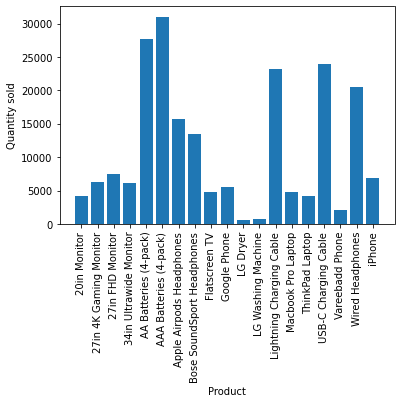

In [59]:
product_group=year_data.groupby('Product')
products=[product for product,df in product_group]
products

plt.bar(products,result5)
plt.xticks(products,rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity sold')

In [60]:
prices=year_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

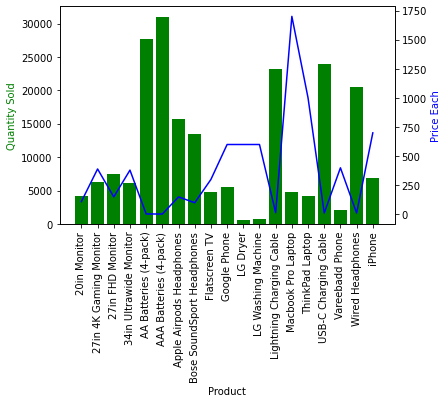

In [61]:
#overlapping above graph with the value of prices for each product

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,result5,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold',color='g')
ax2.set_ylabel('Price Each',color='b')

plt.show()

Who are the repeat customers?

In [62]:
address=year_data['Purchase Address'].unique()
address

array(['550 Lakeview St, Atlanta, GA 30301',
       '586 Willow St, Atlanta, GA 30301',
       '347 Madison St, Atlanta, GA 30301', ...,
       '887 Main St, Seattle, WA 98101', '903 2nd St, Seattle, WA 98101',
       '213 Wilson St, Seattle, WA 98101'], dtype=object)

In [63]:
#df2=pd.merge(year_data[['Purchase Address','Order Date']],year_data[address],on=year_data['address']==address,how='right')
#year_data.groupby('Purchase Address').sum()
df2=year_data[['Purchase Address','Order Date']]
#df3=pd.merge(year_data,df2,on='Purchase Address' and 'Order Date' ,how='inner')
#df2.sort_values('Order Date'/groupby('Purchase Address'))
df3=df2['Purchase Address'].unique()
#df3.sort_values(['Purchase Address','Order Date'],ascending=[1,1])
df3_dataframe = pd.DataFrame(df3)      

df3_dataframe.rename(index=str, columns={0:'Purchase Address'})
#df4=pd.DataFrame(df3,columns='Purchase Address')

,Purchase Address
0,"550 Lakeview St, Atlanta, GA 30301"
1,"586 Willow St, Atlanta, GA 30301"
2,"347 Madison St, Atlanta, GA 30301"
3,"781 Lincoln St, Atlanta, GA 30301"
4,"85 Wilson St, Atlanta, GA 30301"
...,...
140782,"516 Willow St, Seattle, WA 98101"
140783,"167 West St, Seattle, WA 98101"
140784,"887 Main St, Seattle, WA 98101"
140785,"903 2nd St, Seattle, WA 98101"


In [66]:
df3=pd.merge(df3_dataframe,df2,on='Purchase Address',how='inner')

KeyError: ignored

In [65]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,State,hour
16346,311291,iPhone,1,700.00,2019-12-13 20:57:00,"550 Lakeview St, Atlanta, GA 30301",12,700.00,Atlanta(GA),GA 30301,20
7832,217386,USB-C Charging Cable,1,11.95,2019-06-09 02:13:00,"586 Willow St, Atlanta, GA 30301",6,11.95,Atlanta(GA),GA 30301,2
1975,238566,USB-C Charging Cable,1,11.95,2019-08-13 17:34:00,"347 Madison St, Atlanta, GA 30301",8,11.95,Atlanta(GA),GA 30301,17
5735,253653,AAA Batteries (4-pack),2,2.99,2019-09-21 23:33:00,"781 Lincoln St, Atlanta, GA 30301",9,5.98,Atlanta(GA),GA 30301,23
5741,253658,USB-C Charging Cable,1,11.95,2019-09-02 18:25:00,"85 Wilson St, Atlanta, GA 30301",9,11.95,Atlanta(GA),GA 30301,18
